<a href="https://colab.research.google.com/github/miz-ab/Swahili-Speech-To-Text/blob/main/notebooks/Audio_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount our drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#list Directory inside SWAHILI
import os
os.chdir("/content/drive/MyDrive/Week-4/speech_data/ALFFA_PUBLIC/ASR/SWAHILI")
os.listdir()

['LM', 'README', 'data', 'kaldi-scripts', 'lang']

In [3]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=38ac68598ca00d149b0f01207382492f20b7c307fe48a0d0fed196c9323241d6
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [4]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Display  samples and sample_rate 
train_audio_path = '/content/drive/MyDrive/Week-4/speech_data/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav'
samples, sample_rate = librosa.load(train_audio_path)
print(samples)
print(sample_rate)

[0.02953335 0.03225018 0.02603412 ... 0.09593043 0.09478676 0.05775513]
22050


In [6]:
#load and play audio file using librosa
audio, rate=librosa.load('/content/drive/MyDrive/Week-4/speech_data/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav', sr=44100)

In [7]:
ipd.Audio(samples, rate=sample_rate)

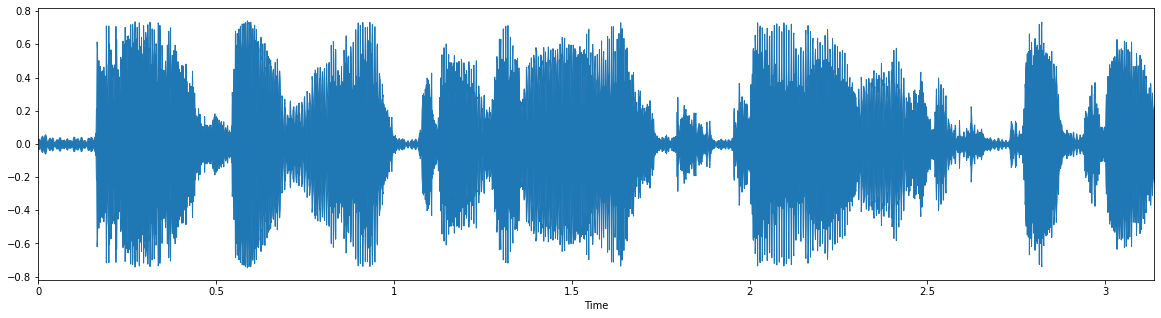

In [8]:
#plot our sample wav file 
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [9]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [10]:
spe_samples,frequency=spectrogram(samples)

In [11]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [12]:
#function that load text file and change it to Dictionary 
def t_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
          line = line.strip()
          alist = line.split('\t',1)
          key, values = alist[0], alist[1:]
          str1 = ''.join(str(e) for e in values)
          name_to_text[key] = str1
  #print(values)
  return name_to_text
    

In [13]:
transcription=t_loader("/content/drive/MyDrive/Week-4/speech_data/ALFFA_PUBLIC/ASR/SWAHILI/data/train/text.txt")

In [14]:
transcription

{'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100': 'yanayo andaliwa nami pendo pondo idhaa ya kiswahili',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101': 'inayokutangazia moja kwa moja kutoka jijini dar es salaam tanzania',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102': 'juma hili bara la afrika limeshuhudia raia wa nchi za niger',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103': 'wakipiga kura ya maoni ilikufanya mabadiliko ya',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part104': 'kule abidjan raia wa jiji hilo',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part105': 'walipata fursa ya kutumia haki yao ya msingi',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part106': 'waziri mkuu wa zamani alasane watara',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part107': 'na rais aliyetangulia henry konan berd

In [15]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings

In [17]:
#export data to csv and save as dataS.csv 
import csv
with open('/content/drive/My Drive/dataS.csv', 'w') as f:
    for key in transcription.keys():
        f.write("%s,%s\n"%(key,transcription[key]))